# Mapeando el Universo



## Introducción al aprendizaje automático

  * Tomar el dataset "limpio" obtenido del práctico anterior y considerar algunos de los siguientes conjuntos de variables
  
   + modelMag_*, colores_modelMag, devRad_*
   + modelMag_*, colores_modelMag, expRad_*
   + petroMag_*, colores_petroMag, petroRad_*, petroR50_*, petroR90_*
  
  * Emplear el modelo de regresión lineal para estimar la variables _redshift_.
   + Considere utilizar o no regulación
    
  * Utilizar algún método para evaluar la complejidad del/de los modelo/s.
  
  * Evaluar que sucede si se distrimina por tipo de galaxia.
  
  * Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias en elípticas y espirales a partir de las variables elegidas.
  
   + Computar las metricas accuracy,precision, recall, F1, matriz de confusión
 
   + Visualización de la frontera de decisión
   

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Matplotlib is building the font cache using fc-list. This may take a moment.


In [4]:
filename = "dataset/data_filter.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

In [6]:
df.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
count,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,...,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000
mean,0.104342,135.548575,184.663017,25.119669,19.486345,17.820442,16.964847,16.554727,16.264905,19.482649,...,0.001363,0.590323,1.665904,0.855595,0.410120,0.289823,1.615551,0.831818,0.386924,0.233235
std,0.053560,74.773948,58.737151,19.010990,0.960267,0.763514,0.675561,0.673814,0.707239,1.157991,...,0.036895,0.491775,0.458326,0.296790,0.097406,0.179993,0.799674,0.352273,0.220364,0.373315
min,-0.006568,0.000000,0.001718,-11.252825,14.226100,13.574420,13.890400,13.758980,12.382540,11.984880,...,0.000000,0.000000,-9.993700,-6.423580,-4.947020,-13.819450,-19.256860,-3.612750,-22.090000,-21.056590
25%,0.066619,83.816160,151.925664,9.675502,18.901570,17.420410,16.635270,16.226100,15.916920,18.858070,...,0.000000,0.000000,1.343030,0.675080,0.373660,0.248440,1.239470,0.639410,0.350710,0.188920
50%,0.097589,131.624900,185.461795,23.769607,19.528360,17.971860,17.157480,16.737970,16.430190,19.460280,...,0.000000,1.000000,1.718690,0.875560,0.422390,0.315140,1.542990,0.843520,0.404890,0.271040
75%,0.136380,181.387900,220.488190,39.551447,20.146590,18.358100,17.474630,17.051040,16.752250,20.062810,...,0.000000,1.000000,1.938110,1.022410,0.463140,0.353350,1.817090,0.995580,0.445390,0.324840
max,1.000208,850.000000,359.997379,70.268882,30.599800,28.401410,25.141300,20.176000,28.553240,41.270800,...,1.000000,1.000000,13.198990,13.050000,9.648550,5.005140,24.066280,19.110600,4.211290,19.374340


In [7]:
df = df[0:10000]

## Primer set de datos: variables Model

In [15]:
filter_col = [col for col in df if col.startswith('modelColor')]
filter_col

['modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']

### Variables usadas vs redshift

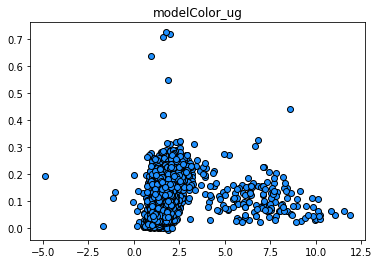

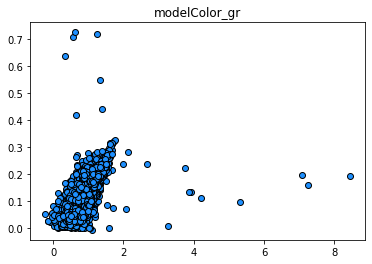

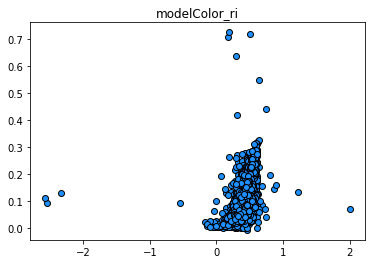

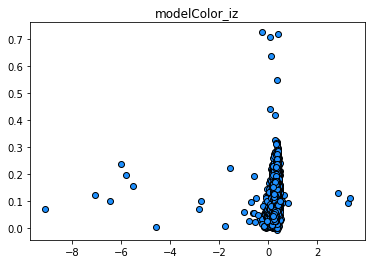

In [16]:
for i in filter_col:
    plt.scatter(df[i],df['z'], facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(i)
    plt.show()

### Pruebas con regresión lineal y grados del polinomio

(8000, 4)
[0.0018560325992764332, 0.005211707934302597, 459.3037171939415, 201964.11759078375, 3426359.8996444806]


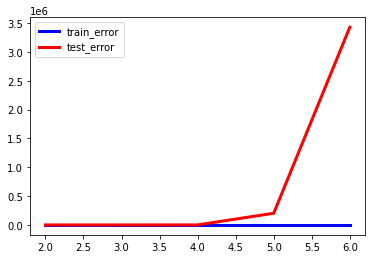

Grado de polinomio con mejor performance: 2
Error: 0.001856


In [44]:
selector =[filter_col]
#selector=['modelMag_u']
min_selector_error = []
min_selector_indx = []
# Los grados se prueban desde init hasta degrees
init = 2
degrees = 6

for j in selector:

    X, y = df[j], df['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    
    print(X_train.shape)

    train_error = []
    test_error = []
    y_test_pred = []

    for i in range(init,degrees+1):
        # Genero los modelos
        model = make_pipeline(PolynomialFeatures(i), LinearRegression())

        # Entreno los modelos
        model.fit(X_train, y_train)

        # Predigo los valores de test
        y_train_pred  = model.predict(X_train)

        # Predigo los valores de train
        y_test_pred.append(model.predict(X_test))

        # Error cuadratico medio entrenamiento
        train_error.append(mean_squared_error(y_train, y_train_pred))

        # Error cuadratico medio test
        test_error.append(mean_squared_error(y_test, y_test_pred[i-init]))

    print(test_error)
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))

    # Grafico error
    plt.plot(range(init,degrees+1), train_error, color="blue", label="train_error", linewidth=3)
    plt.plot(range(init,degrees+1), test_error, color="red", label="test_error", linewidth=3)
    plt.legend()
    plt.show()

print("Grado de polinomio con mejor performance: %d"%(min_selector_indx[0]+init))
print("Error: %f"%(min_selector_error[0]))

### Error cuadrático de cada muestra

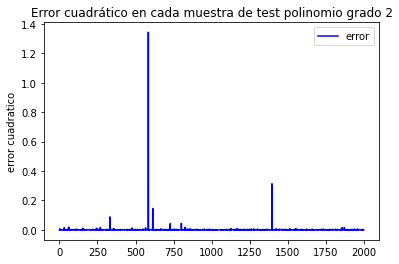

In [19]:
min_indx = test_error.index(min(test_error))
difference = (y_test.values - y_test_pred[min_indx])**2
plt.plot(difference, "b", label="error")
plt.title("Error cuadrático en cada muestra de test polinomio grado %d"%(min_indx+init))
plt.legend()
plt.ylabel("error cuadratico")
plt.show()

In [20]:
# Muestra rara, revisar las magnitudes
max_error_indx = np.where(difference == max(difference))
print(max_error_indx)
y_test.values[max_error_indx[0]]
y_test_pred[min_indx][max_error_indx[0]]

(array([584]),)


array([-0.96520185])

### Regularización  
Se ven problemas de overfitting en el grado 3 y 4. Ridge Regression usa una regresión lineal pero le agrega el término de regularización L2 (con la constante alpha).  
<img src="images/CodeCogsEqn.gif">



In [48]:
from sklearn.linear_model import Ridge

degree = 4
alphas = [0.0, 1e-5, 1e-1, 0.16]

for i in alphas:

    model_norm = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=i))
    model_norm.fit(X_train, y_train)

    # Predigo los valores de test
    y_train_pred_norm  = model_norm.predict(X_train)

    # Predigo los valores de train
    y_test_pred_norm = model_norm.predict(X_test)

    # Error cuadratico medio entrenamiento
    train_error_norm = mean_squared_error(y_train, y_train_pred_norm)

    # Error cuadratico medio test
    test_error_norm = mean_squared_error(y_test, y_test_pred_norm)

    print(test_error_norm)

459.1701886868915
459.1025971240444
0.26467627239411967
0.02334576627650916


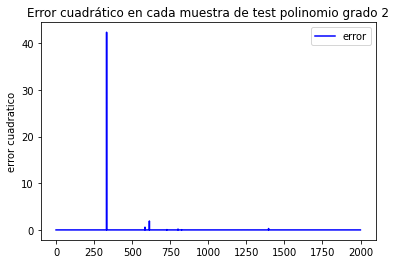

In [49]:
difference = (y_test.values - y_test_pred_norm)**2
plt.plot(difference, "b", label="error")
plt.title("Error cuadrático en cada muestra de test polinomio grado %d"%(min_indx+init))
plt.legend()
plt.ylabel("error cuadratico")
plt.show()

In [50]:
# Muestra rara, revisar las magnitudes
max_error_indx = np.where(difference == max(difference))
print(max_error_indx)
y_test.values[max_error_indx[0]]
y_test_pred_norm[max_error_indx[0]]

(array([332]),)


array([-6.37617711])

### Evaluación de la complejidad de los modelos

## Discriminación por galaxia
No se si es por morfología o tipo

In [59]:
df_spiral = df[df['spiral'] == 1]
df_elliptical = df[df['elliptical'] == 1]

(1906, 4)
[0.0012449189055964243, 0.0013172439696480477, 0.006654824526941024, 0.2001978281445748, 167.8886266072988]


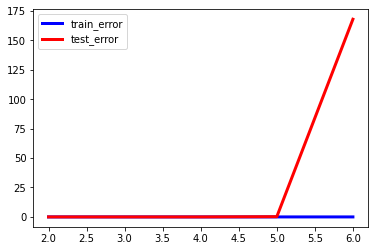

Grado de polinomio con mejor performance: 2
Error: 0.001245


In [60]:
selector =[filter_col]
#selector=['modelMag_u']
min_selector_error = []
min_selector_indx = []
# Los grados se prueban desde init hasta degrees
init = 2
degrees = 6

for j in selector:

    X, y = df_spiral[j], df_spiral['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    
    print(X_train.shape)

    train_error = []
    test_error = []
    y_test_pred = []

    for i in range(init,degrees+1):
        # Genero los modelos
        model = make_pipeline(PolynomialFeatures(i), LinearRegression())

        # Entreno los modelos
        model.fit(X_train, y_train)

        # Predigo los valores de test
        y_train_pred  = model.predict(X_train)

        # Predigo los valores de train
        y_test_pred.append(model.predict(X_test))

        # Error cuadratico medio entrenamiento
        train_error.append(mean_squared_error(y_train, y_train_pred))

        # Error cuadratico medio test
        test_error.append(mean_squared_error(y_test, y_test_pred[i-init]))

    print(test_error)
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))

    # Grafico error
    plt.plot(range(init,degrees+1), train_error, color="blue", label="train_error", linewidth=3)
    plt.plot(range(init,degrees+1), test_error, color="red", label="test_error", linewidth=3)
    plt.legend()
    plt.show()

print("Grado de polinomio con mejor performance: %d"%(min_selector_indx[0]+init))
print("Error: %f"%(min_selector_error[0]))

In [68]:
from sklearn.linear_model import Ridge

degree = 4
alphas = [0.0, 1e-5, 1e-1]

for i in alphas:

    model_norm = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=i))
    model_norm.fit(X_train, y_train)

    # Predigo los valores de test
    y_train_pred_norm  = model_norm.predict(X_train)

    # Predigo los valores de train
    y_test_pred_norm = model_norm.predict(X_test)

    # Error cuadratico medio entrenamiento
    train_error_norm = mean_squared_error(y_train, y_train_pred_norm)

    # Error cuadratico medio test
    test_error_norm = mean_squared_error(y_test, y_test_pred_norm)

    print(test_error_norm)

0.00665538388131704
0.0028070261809180134
0.0010021658201803353


(697, 4)
[0.0004296338234412457, 0.0006723492119048865, 0.034702994683526764, 1.1084181281582477, 1.3303405450622579]


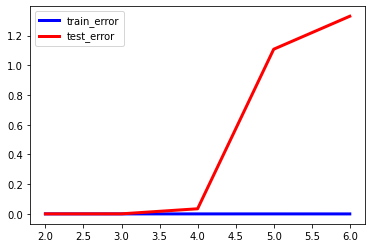

Grado de polinomio con mejor performance: 2
Error: 0.000430


In [70]:
selector =[filter_col]
#selector=['modelMag_u']
min_selector_error = []
min_selector_indx = []
# Los grados se prueban desde init hasta degrees
init = 2
degrees = 6

for j in selector:

    X, y = df_elliptical[j], df_elliptical['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    
    print(X_train.shape)

    train_error = []
    test_error = []
    y_test_pred = []

    for i in range(init,degrees+1):
        # Genero los modelos
        model = make_pipeline(PolynomialFeatures(i), LinearRegression())

        # Entreno los modelos
        model.fit(X_train, y_train)

        # Predigo los valores de test
        y_train_pred  = model.predict(X_train)

        # Predigo los valores de train
        y_test_pred.append(model.predict(X_test))

        # Error cuadratico medio entrenamiento
        train_error.append(mean_squared_error(y_train, y_train_pred))

        # Error cuadratico medio test
        test_error.append(mean_squared_error(y_test, y_test_pred[i-init]))

    print(test_error)
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))

    # Grafico error
    plt.plot(range(init,degrees+1), train_error, color="blue", label="train_error", linewidth=3)
    plt.plot(range(init,degrees+1), test_error, color="red", label="test_error", linewidth=3)
    plt.legend()
    plt.show()

print("Grado de polinomio con mejor performance: %d"%(min_selector_indx[0]+init))
print("Error: %f"%(min_selector_error[0]))

In [75]:
from sklearn.linear_model import Ridge

degree = 3
alphas = [0.0, 1e-5, 1e-1]

for i in alphas:

    model_norm = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=i))
    model_norm.fit(X_train, y_train)

    # Predigo los valores de test
    y_train_pred_norm  = model_norm.predict(X_train)

    # Predigo los valores de train
    y_test_pred_norm = model_norm.predict(X_test)

    # Error cuadratico medio entrenamiento
    train_error_norm = mean_squared_error(y_train, y_train_pred_norm)

    # Error cuadratico medio test
    test_error_norm = mean_squared_error(y_test, y_test_pred_norm)

    print(test_error_norm)

0.0006701516800977505
0.00046238297397399955
0.0003665693116511445


## Utilización de otros métodos para clasificar en elíptica o espiral

Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias en elípticas y espirales a partir de las variables elegidas.

    Computar las metricas accuracy,precision, recall, F1, matriz de confusión

    Visualización de la frontera de decisión



### Clasificador SDGC 

In [77]:
df_sp_or_ell = pd.concat([df_spiral, df_elliptical])

In [78]:
df_sp_or_ell

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
specObjID,,,,,,,,,,,,,,,,,,,,,
957065537576265728,0.140137,138.90830,197.473340,4.417710,NaN,19.56201,18.19559,17.34286,16.92395,16.61079,...,0,1,1.36642,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301
637262958233151488,0.098105,135.15380,137.577476,2.613135,NaN,20.37811,18.37596,17.37777,16.95891,16.61865,...,0,1,2.00215,0.99819,0.41886,0.34026,1.87594,1.00148,0.41436,0.36765
637266806523848704,0.098102,112.93020,137.866935,3.050839,NaN,21.06598,18.83291,17.75186,17.16733,16.69356,...,0,1,2.23307,1.08105,0.58453,0.47377,1.55629,0.93613,0.56206,0.31988
657534650943563776,0.088232,49.05451,216.967778,4.175325,STARFORMING,18.77377,17.50497,16.98801,16.68087,16.50830,...,0,0,1.26880,0.51696,0.30714,0.17257,1.21089,0.47204,0.26622,0.14915
477392312498939904,0.127602,116.65900,22.041313,14.228646,STARFORMING,19.81958,18.42553,17.61714,17.16931,16.88651,...,0,0,1.39405,0.80839,0.44783,0.28280,1.10243,0.73495,0.37401,0.32365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959342077022332928,0.132871,330.24230,200.900242,4.711169,NaN,19.11093,17.13545,16.01391,15.54770,15.13255,...,0,1,1.97548,1.12154,0.46621,0.41515,1.70464,1.06790,0.46388,0.40616
684589784349304832,0.150769,191.15240,221.542753,59.402123,STARFORMING,19.23890,17.61519,16.61765,16.16645,15.84133,...,0,0,1.62371,0.99754,0.45120,0.32512,1.55378,0.99450,0.42011,0.15183
862561412130564096,0.224227,243.56510,139.232903,51.654635,NaN,20.75787,18.79548,17.44324,16.92546,16.57029,...,0,1,1.96239,1.35224,0.51778,0.35517,1.76383,1.30432,0.50001,0.32836


In [87]:
df_filter = df_sp_or_ell[filter_col]
X, y = df_filter.iloc[:,:], df_sp_or_ell['spiral']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
#from utils import plot_confusion_matrix

model = SGDClassifier(random_state=0, shuffle = True)

model.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [146]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [147]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  0.8317972350230415
Test Accuracy:  0.815668202764977


In [148]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.168
Test error:0.184


In [149]:
precision_score(y_test, y_test_pred)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.

0.8803418803418803

In [95]:
recall_score(y_test, y_test_pred)

0.865546218487395

In [96]:
f1_score(y_test, y_test_pred)

0.8728813559322035

In [97]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[119  56]
 [ 64 412]]


In [101]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

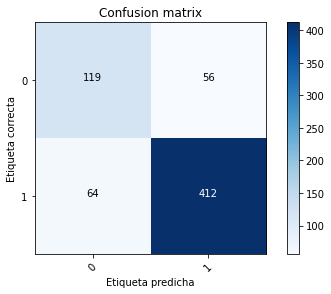

In [102]:
plot_confusion_matrix(cm, [0,1])

### Perceptron

In [150]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

regr = MLPClassifier(hidden_layer_sizes=(35), max_iter=10000,
                   activation='relu', random_state = 9,
                   solver='lbfgs')
regr.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=35, max_iter=10000, random_state=9,
              solver='lbfgs')

In [151]:
#  Predicción (predict):
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [152]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.127
Test error:0.143


In [154]:
precision_score(y_test.values.astype(np.float), y_test_pred)

0.908315565031983

In [156]:
recall_score(y_test, y_test_pred)

0.8949579831932774

In [157]:
f1_score(y_test, y_test_pred)

0.9015873015873017

In [158]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[132  43]
 [ 50 426]]


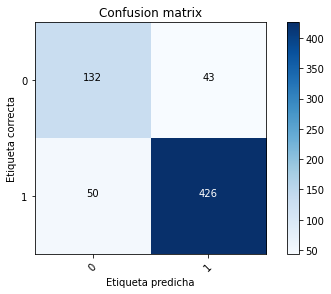

In [159]:
plot_confusion_matrix(cm, [0,1])

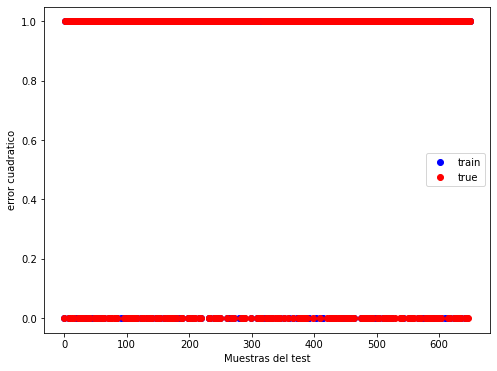

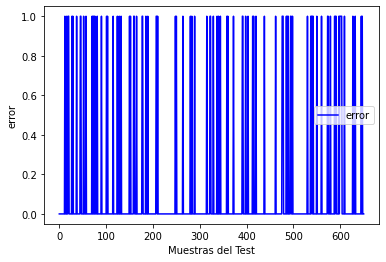

In [155]:
# Gráfico de curvas de error
plt.figure(figsize=(8,6))

plt.plot(y_test.values, "bo", label="train")
plt.plot(y_test_pred, "ro", label="true")
plt.legend()
plt.xlabel("Muestras del test")
plt.ylabel("error cuadratico")
plt.show()

difference = (y_test_filter.values - y_test_pred)**2

plt.plot(difference, "b", label="error")
plt.legend()
plt.xlabel("Muestras del Test")
plt.ylabel("error")
plt.show()

## Falta plotear la region de decisión de los dos modelos